In [1]:
import pandas as pd

In [17]:
dataset= pd.read_csv(r'C:\Users\panth\Downloads\Final Project 2\gld_price_data.csv')

In [18]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [19]:
print(dataset.shape)

(2290, 6)


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [21]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [23]:
print(dataset.isnull().sum())

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [24]:
dataset.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

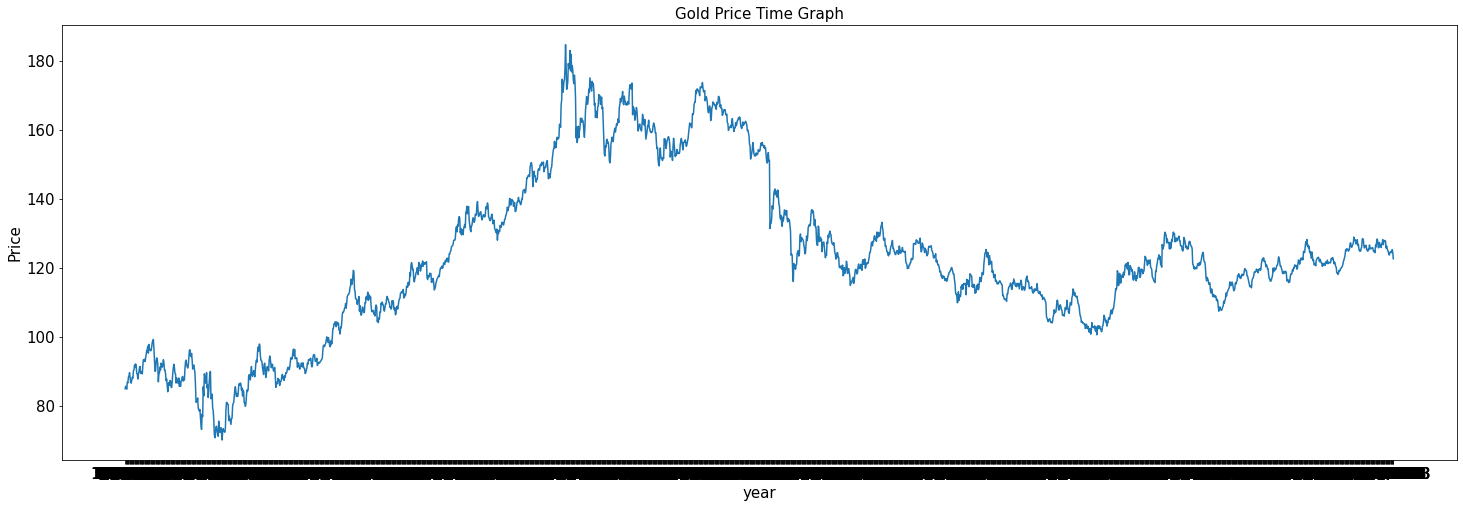

In [30]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.title('Gold Price Time Graph',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.plot(dataset.Date,dataset.GLD)
plt.show()

<AxesSubplot:>

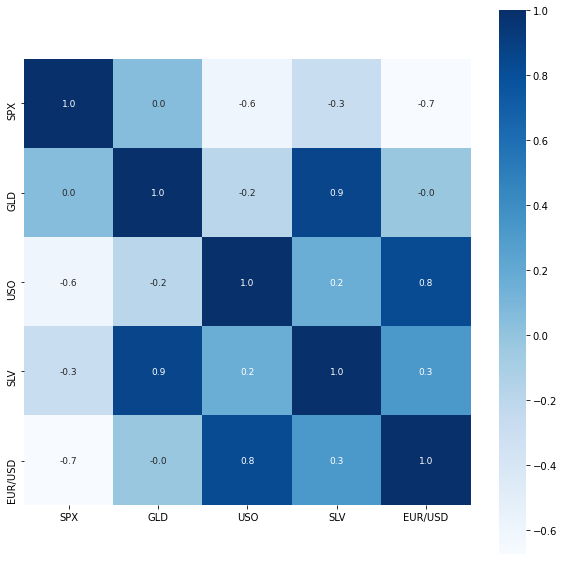

In [34]:
plt.figure(figsize=(10,10))
corr = dataset.corr()
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':9},cmap='Blues')

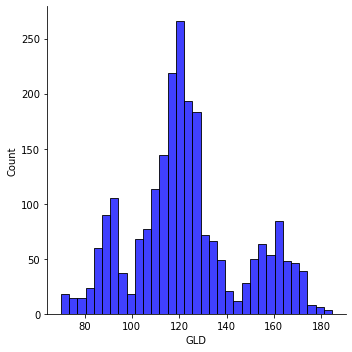

In [36]:
sns.displot(dataset.GLD,color='b')


In [41]:
x= dataset.drop(['Date','GLD'],axis=1)
y=dataset['GLD']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [47]:
from sklearn.ensemble  import RandomForestRegressor
from sklearn.metrics import r2_score

In [48]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [49]:
y_train_pred = model.predict(x_train)
train_score = r2_score(y_train,y_train_pred)
print(f'Train Data Accuracy : {round(train_score*100,2)} %')

Train Data Accuracy : 99.85 %


In [51]:
y_test_pred = model.predict(x_test)
test_score = r2_score(y_test,y_test_pred)
print(f'Train Data Accuracy : {round(test_score*100,2)} %')

Train Data Accuracy : 98.53 %


In [52]:
n = int(input('Enter row no to test model'))
print(y[n:n+1])
model.predict(x[n:n+1])

Enter row no to test model56
56    92.730003
Name: GLD, dtype: float64


array([92.45140177])